CV CS4375 HW8

Ramesh Kanakala

This is a Python notebook with the purpose of exploring wine quality classification with logistic regression and decision tree algorithms.

Step 1

In [3]:
import pandas as pd
df = pd.read_csv('wineQualityReds.csv')
#print first few rows
print(df.head())
#dimensions
print(df.shape)

   Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0           1            7.4              0.70         0.00             1.9   
1           2            7.8              0.88         0.00             2.6   
2           3            7.8              0.76         0.04             2.3   
3           4           11.2              0.28         0.56             1.9   
4           5            7.4              0.70         0.00             1.9   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68  

Step 2

In [5]:
#describe mpg, weight, and year
print(df.loc[:, ['quality', 'alcohol', 'pH']].describe())

           quality      alcohol           pH
count  1599.000000  1599.000000  1599.000000
mean      5.636023    10.422983     3.311113
std       0.807569     1.065668     0.154386
min       3.000000     8.400000     2.740000
25%       5.000000     9.500000     3.210000
50%       6.000000    10.200000     3.310000
75%       6.000000    11.100000     3.400000
max       8.000000    14.900000     4.010000


In [6]:
        #range   #average
#quality     5   5.636023   
#alcohol     6  10.422983   
#pH       1.27   3.311113

Step 3

In [7]:
#check data types
print(df.dtypes)
#change quality to categorical with cat.codes
df.quality = df.quality.astype('category').cat.codes
#drop obs num column
del df['Unnamed: 0']
#verify changes
print('\nAfter changes:\n', df.dtypes)

Unnamed: 0                int64
fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

After changes:
 fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                    int8
dtype: object


Step 4

In [8]:
#delete rows with NAs
df = df.dropna()
#new dimensions
print(df.shape)

(1599, 12)


Step 5

In [9]:
import numpy as np
#make new mpg_high columns
df['qual_high'] = np.where(df.quality > np.mean(df.quality), 1, 0)
df.qual_high = df.qual_high.astype('category').cat.codes
#delete mpg and name columns
df.drop('quality', inplace=True, axis=1)
#print first few rows to verify
print(df.head())

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  qual_high  
0      9.4          0  
1      9.8          0  
2      9.8    

Step 6

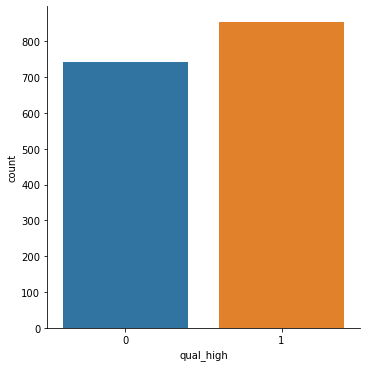

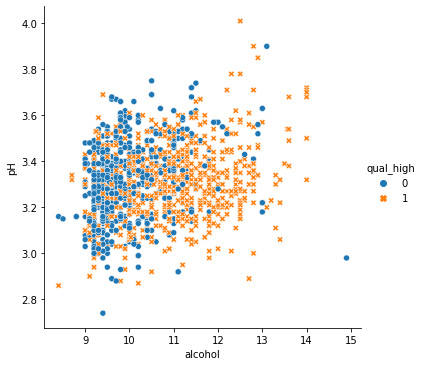

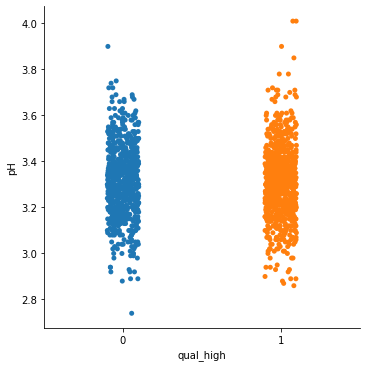

In [11]:
import seaborn as sb
#catplot of mpg_high
sb.catplot(x="qual_high", kind="count", data=df)
#relplot of horsepower vs weight
sb.relplot(x="alcohol", y="pH",
data=df, hue=df.qual_high, style=df.qual_high)
#boxplot of mpg_high vs weight
sb.catplot(x="qual_high", y="pH", data=df)

In the first graph, we can see there are more vehicles that have an high quality. The difference is very small, however, so the data is still quite balanced in this aspect.

The second graph reveals that wines that have an quality that is less than the average quality are associated with lower alcohol content and whereas the higher-than-average quality wines have a higher alcohol content. The pH is levels are roughly the same between the higher and lower quality wines.

The last graph reiterates the fact that pH doesn't seem to be highly associated with a lower or higher quality wine. The distributions are roughly the same size and are over the same pH interval. The higher quality wines seem to have some higher pH outliers.

Step 7

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:10]
y = df.iloc[:, 11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=1234)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (1279, 10)
test size: (320, 10)


Step 8

In [21]:
#logistic regression training
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=400)
clf.fit(X_train, y_train)
#test and evaluate metrics
pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       148
           1       0.70      0.77      0.73       172

    accuracy                           0.70       320
   macro avg       0.70      0.69      0.69       320
weighted avg       0.70      0.70      0.69       320



Step 9

In [23]:
#decision tree training
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)
#test and evaluate metrics
pred2 = clf2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       148
           1       0.77      0.77      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



Step 10

The decision tree algorithm performed better than the logistic regression algorithm as seen with the overall higher precision and recall scores and related higher f1 scores (f1 is the harmonic mean between precision and recall) that it has. The tree also has a higher macro avg., weighted avg., and accuracy both overall in for both classes. 

The decision tree may have outperformed logistic regression in this case as the relationship between qual_high and the other predictors might not be too linear and complex and has multiple splits. Logistic regression on the other hand assumes only a single decision boundary which might not be the case here. Decision trees have multiple boundaries that are parallel to axes, and with simple rules that can divide vehicles into separate groups, it can excel.